Backward Difference Scheme
==============

# Theory
Anther variant scheme of finite difference and as straight forward as forward difference approximation is the **Backward Difference Approximation (BD)**. 

## Definition
Recall that definition of derivative of function $f(x)$ at some point $x$ is
$$
\begin{equation}
    f^\prime(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}
\end{equation}$$

The **BD approximation** consider the point behind our point of derivation to construct the finite difference formula *"Oppose to definition of derivative and what has been introduced in **FD approximation**"*.
$$ \begin{equation}
f^\prime(x) \approx \frac{f(x) - f(x-h)}{h} \end{equation}
$$
<img src="./Resources/BD Approx.png" width="1000">

The **BD approximation** is a **Two Points Stencil** arrangement *"same as **FD approximation**"*, where it is constructed by the current node and its backward neighboring node.

## Examples
Let $f(x) = 3\sin(x)$ find the finite difference approximation of the first derivative at $x=2$ and compare it with the analytical solution. Consider $h=0.1$

$$
\begin{align*}
\bold{FD:}& \qquad \nabla_h^{(1)} = \frac{3\sin(2) - 3\sin(2-0.1)}{0.1} = -1.110079\dots\\[10pt]
\bold{Analytical:}& \qquad f'(x) = 3\cos(2) = -1.248440\dots
\end{align*}
$$

# Implementation

## Imports

In [4]:
import numpy as np
import sympy as sp
import pandas as pd
from sympy.abc import x
from typing import Callable
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

## Parameters

In [ ]:
domain = [-2,2]
h = 1
func = sp.sin(x)         # use sp. methods only "i.e sp.cos()"

## Algorithm

```mermaid
    flowchart LR
        get_x(Get domain x) --> f_prime(Compute equ.1 on each x)
```

In [ ]:
def BD(f: Callable, x: float, h: float) -> float:
    '''
    Backward finite difference approximation of the derivative for a given function `f`

    Args:
        f: Function to approximate the derivative
        x: Point to evaluate the derivative at
        h: Discretization factor or step size

    Returns:
        Derivative approximation at the given point `x`
    '''
    
    return (f(x) - f(x-h)) / h

### Error Analysis
This investigation aims to illustrate accuracy of the finite difference backward scheme approximation of the derivative. Common error metrics/visualization used are
- Derivative Plot: The closeness of the FD derivative approximation to the analytical
- Error Scatter: Investigation of error trends and magnitude
- $L_2$ Norm: Quantitative measure of total error
- Mean Squared Error (MSE): Quantitative measure of total error
- Maximum Absolute Error: Quantitative measure on the maximum error

In [ ]:
# domain
xx = np.linspace(*domain)
xx_h = np.linspace(*domain, int((domain[1] - domain[0]) / h + 1))

# analytical derivative
func_prime = sp.diff(func)

# parse expressions to lambda
f = (lambda x : np.ones_like(x)*float(func)) if sp.simplify(func).is_constant() else sp.lambdify(x, func) 
f_prime = (lambda x : np.ones_like(x)*float(func_prime)) if sp.simplify(func_prime).is_constant() else sp.lambdify(x, func_prime)

# finite-difference approximation
f_prime_FD = [BD(f, x, h) for x in xx_h]

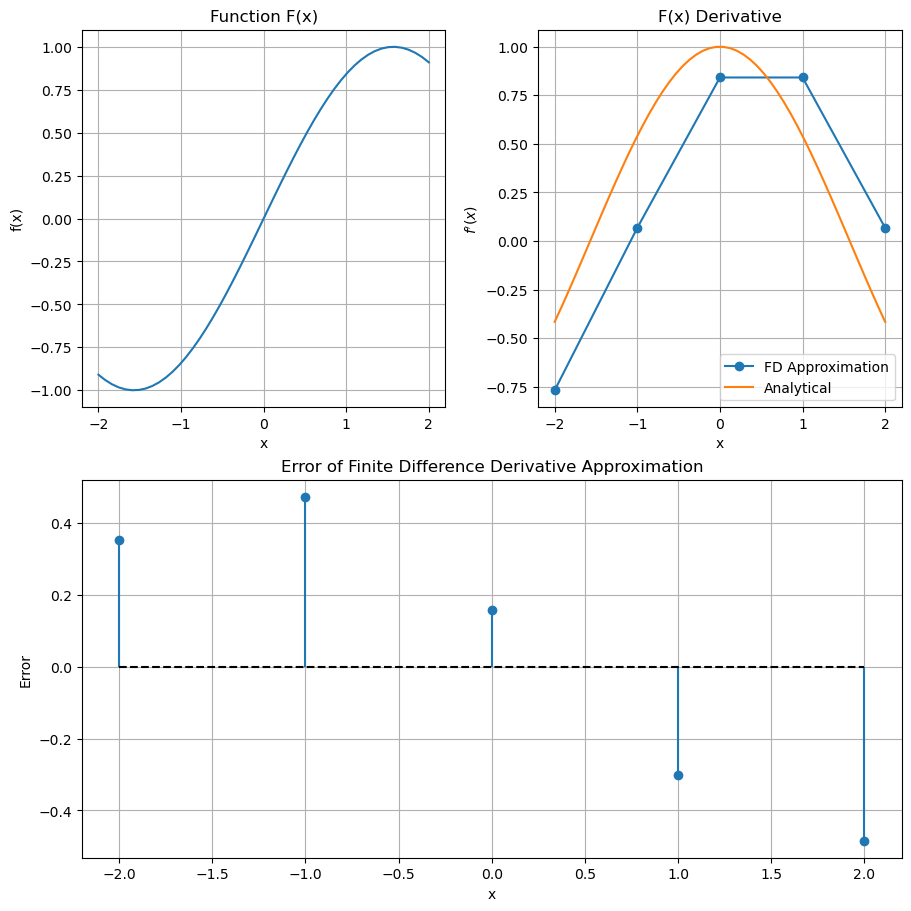

,Property,Quantity
0,l_2 error norm,0.834999
1,mean squared error,0.139445
2,maximum error,0.483973


In [ ]:
fig, ax = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'lower left']],
                              figsize=(9,9), layout="constrained")

# f(x) plot
ax['upper left'].plot(xx, f(xx))
ax['upper left'].set(xlabel="x", ylabel="f(x)", title="Function F(x)")
ax['upper left'].grid(True)

# derivative of f(x) plot
ax['right'].plot(xx_h, f_prime_FD, marker="o", label="FD Approximation")
ax['right'].plot(xx, f_prime(xx), label="Analytical")
ax['right'].set(xlabel="x", ylabel=r"$f'(x)$", title="F(x) Derivative")
ax['right'].legend()
ax['right'].grid(True)

# error
error = f_prime(xx_h) - f_prime_FD
ax['lower left'].stem(xx_h, error, basefmt="k--")
ax['lower left'].set(xlabel="x", ylabel="Error", title="Error of Finite Difference Derivative Approximation")
ax['lower left'].grid(True)

# summary
summary = [
    ("l_2 error norm", np.linalg.norm((error))),
    ("mean squared error", np.mean(abs(error)**2)),
    ("maximum error", np.max(abs(error)))
    ]

df = pd.DataFrame(data=summary, columns=["Property", "Quantity"])

plt.show()
df

One can see from the plots above that the **backward difference approximation** tend to **underestimate** the actual derivative in the region where the derivative is going in increasing trend and **overestimate** the actual derivative when the derivative is going in decreasing trend.

### Convergence Analysis
In this section we will investigate the order of convergence of the scheme. This property tells us at which rate "aka order" the truncation error in the scheme change as we change the spacing parameter $h$ "i.e. the asymptotic change of the truncation error", particularly as  $h \rightarrow 0$. We will investigate this analytically and experimentally.
- Analytically: This through the definition finite difference that's derived from taylor expansion
- Experimentally: Convergence plot where we trace the error as $h$ changes

#### Analytically
The taylor expansion of $f(x)$ around a shifted location $x = x - h$ where $h \gt 0$
$$\begin{equation*}
f(x - h) = f(x) - \frac{h}{1!}f^\prime(x) + \frac{h^2}{2!}f^{\prime\prime}(x) - \dots + \frac{h^n}{n!}f^{(n)}(x) \end{equation*} \\
$$

Rearranging the terms and multiply both side by $-1/h$, one can see that the backward difference approximation *"one the left hand side"*
$$
\begin{equation*}
\Longrightarrow \frac{f(x) - f(x - h)}{h} = f^\prime(x) \;\; \underbrace{- \frac{h}{2!}f^{\prime\prime}(x) + \dots - \frac{h^n}{n!}f^{(n)}(x)}_{O(h)}
\end{equation*}
$$
We can see from the right hand side that backward difference is an approximation with error of order $O(h)$ "i.e. first-order accurate".

#### Experimentally
This achieved by tracing the error of the approximation for different ranges of $h$ and then plot them against each other. To study the asymptotic change we also plot the relation in log plo
>**Note:** Why log plot? we want to overlook any variation of the error plot that might appear in the normal scale, since this will allow us to better spot its overall trend "i.e. $O(h), \; O(h^2) \;\dots$"

In [ ]:
H = np.geomspace(0.0001, 1, num=20) 

errors=[]
for h_i in H:
    error = f_prime(2) - BD(f, 2, h_i)
    errors.append(abs(error))

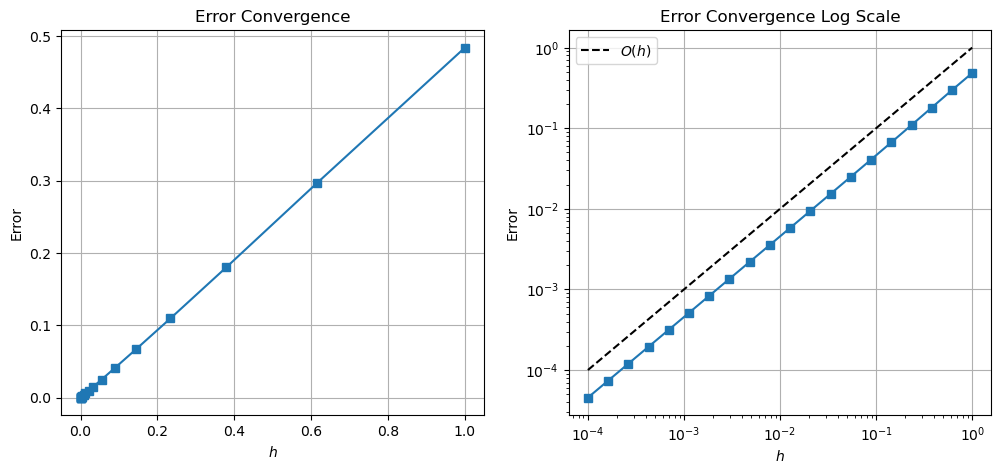

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

# convergence
ax[0].plot(H, errors, marker="s")
ax[0].set(xlabel=r"$h$", ylabel="Error", title="Error Convergence")
ax[0].grid(True)

# convergence log scale
ax[1].plot(H, H, "k--", label=r"$O(h)$")                 # trend line O(h)
ax[1].plot(H, errors, marker="s")
ax[1].set(xlabel=r"$h$", ylabel="Error", title="Error Convergence Log Scale", xscale="log", yscale="log")
ax[1].grid(True)
ax[1].legend()

plt.show()